In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [83]:
df = pd.read_csv('YourCabs_training.csv')

In [84]:
df.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   package_id           7550 non-null   float64
 4   travel_type_id       43431 non-null  int64  
 5   from_area_id         43343 non-null  float64
 6   to_area_id           34293 non-null  float64
 7   from_city_id         16345 non-null  float64
 8   to_city_id           1588 non-null   float64
 9   from_date            43431 non-null  object 
 10  to_date              25541 non-null  float64
 11  online_booking       43431 non-null  int64  
 12  mobile_site_booking  43431 non-null  int64  
 13  booking_created      43431 non-null  object 
 14  from_lat             43338 non-null  float64
 15  from_long            43338 non-null 

In [86]:
for ele in df.columns:
  print(ele)
  val = df[ele].value_counts().count()
  print(val)

id
43431
user_id
22267
vehicle_model_id
27
package_id
7
travel_type_id
3
from_area_id
598
to_area_id
568
from_city_id
3
to_city_id
116
from_date
20377
to_date
22151
online_booking
2
mobile_site_booking
2
booking_created
39349
from_lat
466
from_long
462
to_lat
450
to_long
447
Car_Cancellation
2


In [87]:
df = df.drop(['id', 'user_id'], axis=1)

In [88]:
df['vehicle_model_id'].value_counts()

12    31859
85     2407
89     2391
65     1912
28     1702
24     1494
87      565
90      312
23      297
86      123
10      104
64       85
54       73
17       40
91       25
30       14
36        9
13        7
72        2
1         2
43        2
14        1
69        1
76        1
75        1
70        1
39        1
Name: vehicle_model_id, dtype: int64

In [89]:
df = df.drop('vehicle_model_id', axis=1)

In [90]:
df.columns

Index(['package_id', 'travel_type_id', 'from_area_id', 'to_area_id',
       'from_city_id', 'to_city_id', 'from_date', 'to_date', 'online_booking',
       'mobile_site_booking', 'booking_created', 'from_lat', 'from_long',
       'to_lat', 'to_long', 'Car_Cancellation'],
      dtype='object')

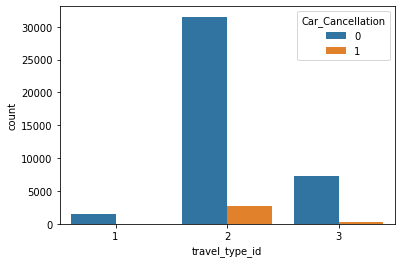

In [91]:
sns.countplot(data=df, x='travel_type_id', hue='Car_Cancellation')

In [92]:
df = df[df['travel_type_id'] == 2]

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34292 entries, 0 to 43430
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   package_id           0 non-null      float64
 1   travel_type_id       34292 non-null  int64  
 2   from_area_id         34292 non-null  float64
 3   to_area_id           34292 non-null  float64
 4   from_city_id         14504 non-null  float64
 5   to_city_id           0 non-null      float64
 6   from_date            34292 non-null  object 
 7   to_date              19107 non-null  float64
 8   online_booking       34292 non-null  int64  
 9   mobile_site_booking  34292 non-null  int64  
 10  booking_created      34292 non-null  object 
 11  from_lat             34292 non-null  float64
 12  from_long            34292 non-null  float64
 13  to_lat               34292 non-null  float64
 14  to_long              34292 non-null  float64
 15  Car_Cancellation     34292 non-null 

In [94]:
df = df.drop(['package_id', 'travel_type_id', 'from_city_id', 'to_city_id', 'to_date'], axis=1)

In [95]:
df['from_area_id'].value_counts()

393.0     3375
571.0     1198
585.0      798
293.0      760
1384.0     599
          ... 
1235.0       1
1209.0       1
1094.0       1
770.0        1
1403.0       1
Name: from_area_id, Length: 586, dtype: int64

In [96]:
df['to_area_id'].value_counts()

393.0     8777
585.0     2339
1384.0    1237
571.0      664
293.0      555
          ... 
1343.0       1
1356.0       1
262.0        1
1271.0       1
1403.0       1
Name: to_area_id, Length: 567, dtype: int64

In [97]:
df['online_booking'].value_counts()

0    21842
1    12450
Name: online_booking, dtype: int64

In [98]:
df['mobile_site_booking'].value_counts()

0    32643
1     1649
Name: mobile_site_booking, dtype: int64

In [99]:
df['booking_created'].value_counts()

10/31/2013 10:30    18
10/31/2013 9:58     17
8/1/2013 7:24       15
8/31/2013 9:51      14
10/9/2013 10:02     13
                    ..
5/16/2013 16:16      1
5/16/2013 16:13      1
5/16/2013 16:04      1
5/16/2013 16:03      1
11/24/2013 14:50     1
Name: booking_created, Length: 31200, dtype: int64

In [100]:
df['from_lat'].value_counts()

13.199560    3375
12.951850    1198
12.976770     944
13.028530     846
12.849482     760
             ... 
12.971020       1
13.031318       1
12.946000       1
12.998700       1
13.175103       1
Name: from_lat, Length: 458, dtype: int64

In [101]:
df['to_lat'].value_counts()

13.199560    8777
12.976770    2573
13.028530    1531
12.951850     664
12.849482     555
             ... 
12.824606       1
12.983127       1
12.995818       1
12.966211       1
13.175103       1
Name: to_lat, Length: 449, dtype: int64

In [102]:
df['from_long'].value_counts()

77.706880    3409
77.696420    1198
77.572700     944
77.546250     846
77.663187     760
             ... 
77.586480       1
77.537570       1
77.591980       1
77.580040       1
77.595009       1
Name: from_long, Length: 454, dtype: int64

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34292 entries, 0 to 43430
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   from_area_id         34292 non-null  float64
 1   to_area_id           34292 non-null  float64
 2   from_date            34292 non-null  object 
 3   online_booking       34292 non-null  int64  
 4   mobile_site_booking  34292 non-null  int64  
 5   booking_created      34292 non-null  object 
 6   from_lat             34292 non-null  float64
 7   from_long            34292 non-null  float64
 8   to_lat               34292 non-null  float64
 9   to_long              34292 non-null  float64
 10  Car_Cancellation     34292 non-null  int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 3.1+ MB


In [104]:
df['from_area_id'].value_counts()

393.0     3375
571.0     1198
585.0      798
293.0      760
1384.0     599
          ... 
1235.0       1
1209.0       1
1094.0       1
770.0        1
1403.0       1
Name: from_area_id, Length: 586, dtype: int64

In [105]:
df['from_area_id'] = df['from_area_id'].astype('str')

In [106]:
df.groupby('from_area_id')['Car_Cancellation'].sum()

from_area_id
1004.0     0
1005.0     7
1008.0     1
1010.0    51
1012.0     3
          ..
987.0      2
988.0      2
990.0      1
994.0      9
995.0      1
Name: Car_Cancellation, Length: 586, dtype: int64

In [107]:
df.groupby('from_area_id')['Car_Cancellation'].count()

from_area_id
1004.0      3
1005.0     44
1008.0     21
1010.0    557
1012.0     48
         ... 
987.0       5
988.0      48
990.0      10
994.0      40
995.0      10
Name: Car_Cancellation, Length: 586, dtype: int64

In [108]:
round((df.groupby('from_area_id')['Car_Cancellation'].sum()/df.groupby('from_area_id')['Car_Cancellation'].count())*100, 2).replace(np.nan, 0)

from_area_id
1004.0     0.00
1005.0    15.91
1008.0     4.76
1010.0     9.16
1012.0     6.25
          ...  
987.0     40.00
988.0      4.17
990.0     10.00
994.0     22.50
995.0     10.00
Name: Car_Cancellation, Length: 586, dtype: float64

In [109]:
df['cancellation_per_area'] = df.groupby('from_area_id')['Car_Cancellation'].transform(lambda value: ((100*value.sum())/ value.count()))
df['cancellation_per_area'].replace(np.nan, 0, inplace=True)

In [110]:
df.head()

,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,cancellation_per_area
0,83.0,448.0,1/1/2013 2:00,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,10.611511
1,1010.0,540.0,1/1/2013 9:00,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,9.156194
2,1301.0,1034.0,1/1/2013 3:30,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,7.368421
3,768.0,398.0,1/1/2013 5:45,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,0.367647
4,1365.0,849.0,1/1/2013 9:00,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,13.636364


In [111]:
cancel_cond = [(df['cancellation_per_area'].between(0.0, 33)), (df['cancellation_per_area'].between(33, 66)), (df['cancellation_per_area'].between(66, 100))]
cancel_labels = ['low', 'medium', 'high']
df['cancel_density_from_area'] = np.select(cancel_cond, cancel_labels)
df.head()

,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,cancellation_per_area,cancel_density_from_area
0,83.0,448.0,1/1/2013 2:00,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,10.611511,low
1,1010.0,540.0,1/1/2013 9:00,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,9.156194,low
2,1301.0,1034.0,1/1/2013 3:30,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,7.368421,low
3,768.0,398.0,1/1/2013 5:45,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,0.367647,low
4,1365.0,849.0,1/1/2013 9:00,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,13.636364,low


In [112]:
df['cancel_density_from_area'].value_counts()

low       33982
medium      298
high         12
Name: cancel_density_from_area, dtype: int64

In [113]:
pd.qcut(df['cancellation_per_area'].rank(method='first'),3)

0          (22861.667, 34292.0]
1        (11431.333, 22861.667]
2        (11431.333, 22861.667]
3            (0.999, 11431.333]
4          (22861.667, 34292.0]
                  ...          
43425        (0.999, 11431.333]
43426        (0.999, 11431.333]
43427        (0.999, 11431.333]
43429    (11431.333, 22861.667]
43430    (11431.333, 22861.667]
Name: cancellation_per_area, Length: 34292, dtype: category
Categories (3, interval[float64, right]): [(0.999, 11431.333] < (11431.333, 22861.667] <
                                           (22861.667, 34292.0]]

In [114]:
df['cancellation_per_area'].describe()

count    34292.000000
mean         8.092266
std          6.122108
min          0.000000
25%          3.407407
50%          7.272727
75%         10.757946
max        100.000000
Name: cancellation_per_area, dtype: float64

In [115]:
df['cancellation_per_area']

temp = df[df['cancellation_per_area'] != 0 ]['cancellation_per_area']
temp.describe()

count    32533.000000
mean         8.529801
std          5.981184
min          0.367647
25%          3.745318
50%          8.080808
75%         10.958904
max        100.000000
Name: cancellation_per_area, dtype: float64

In [116]:
pd.qcut(temp,3)

0         (10.0, 100.0]
1         (5.405, 10.0]
2         (5.405, 10.0]
3        (0.367, 5.405]
4         (10.0, 100.0]
              ...      
43425    (0.367, 5.405]
43426    (0.367, 5.405]
43427    (0.367, 5.405]
43429    (0.367, 5.405]
43430     (5.405, 10.0]
Name: cancellation_per_area, Length: 32533, dtype: category
Categories (3, interval[float64, right]): [(0.367, 5.405] < (5.405, 10.0] < (10.0, 100.0]]

In [117]:
cancel_cond = [(df['cancellation_per_area'].between(0.0, 0)) ,(df['cancellation_per_area'].between(0.01, 5.40)), (df['cancellation_per_area'].between(5.40, 10.0)), (df['cancellation_per_area'].between(10.0, 100))]
cancel_labels = ['no cancellation', 'low', 'medium', 'high']
df['cancel_density_from_area'] = np.select(cancel_cond, cancel_labels)
df.head()

,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,cancellation_per_area,cancel_density_from_area
0,83.0,448.0,1/1/2013 2:00,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,10.611511,high
1,1010.0,540.0,1/1/2013 9:00,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,9.156194,medium
2,1301.0,1034.0,1/1/2013 3:30,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,7.368421,medium
3,768.0,398.0,1/1/2013 5:45,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,0.367647,low
4,1365.0,849.0,1/1/2013 9:00,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,13.636364,high


In [118]:
df = df.drop(['from_area_id', 'cancellation_per_area'], axis=1)
df.head()

,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,cancel_density_from_area
0,448.0,1/1/2013 2:00,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,high
1,540.0,1/1/2013 9:00,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,medium
2,1034.0,1/1/2013 3:30,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,medium
3,398.0,1/1/2013 5:45,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,low
4,849.0,1/1/2013 9:00,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,high


In [119]:
df['cancellation_per_area'] = df.groupby('to_area_id')['Car_Cancellation'].transform(lambda value: ((100*value.sum())/ value.count()))
df['cancellation_per_area'].replace(np.nan, 0, inplace=True)

In [120]:
df['cancellation_per_area'].describe()

count    34292.000000
mean         8.092266
std          6.850065
min          0.000000
25%          1.515324
50%          7.692308
75%         11.363636
max        100.000000
Name: cancellation_per_area, dtype: float64

In [121]:
df['cancellation_per_area']

temp = df[df['cancellation_per_area'] != 0 ]['cancellation_per_area']
temp.describe()

count    33053.000000
mean         8.395607
std          6.792318
min          0.751880
25%          1.515324
50%          8.132530
75%         11.764706
max        100.000000
Name: cancellation_per_area, dtype: float64

In [122]:
pd.qcut(temp,3)

0         (0.751, 4.545]
1        (4.545, 10.294]
2         (0.751, 4.545]
4        (10.294, 100.0]
5         (0.751, 4.545]
              ...       
43425    (10.294, 100.0]
43426    (10.294, 100.0]
43427    (4.545, 10.294]
43429    (10.294, 100.0]
43430     (0.751, 4.545]
Name: cancellation_per_area, Length: 33053, dtype: category
Categories (3, interval[float64, right]): [(0.751, 4.545] < (4.545, 10.294] < (10.294, 100.0]]

In [123]:
cancel_cond = [(df['cancellation_per_area'].between(0.0, 0)) ,(df['cancellation_per_area'].between(0.01, 4.54)), (df['cancellation_per_area'].between(4.54, 10.29)), (df['cancellation_per_area'].between(10.29, 100))]
cancel_labels = ['no cancellation', 'low', 'medium', 'high']
df['cancel_density_to_area'] = np.select(cancel_cond, cancel_labels)
df.head()

,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,cancel_density_from_area,cancellation_per_area,cancel_density_to_area
0,448.0,1/1/2013 2:00,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,high,3.968254,low
1,540.0,1/1/2013 9:00,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,medium,8.695652,medium
2,1034.0,1/1/2013 3:30,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,medium,2.040816,low
3,398.0,1/1/2013 5:45,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,low,0.000000,no cancellation
4,849.0,1/1/2013 9:00,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,high,17.021277,high


In [124]:
df = df.drop(['to_area_id', 'cancellation_per_area'], axis=1)
df.head()

,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,cancel_density_from_area,cancel_density_to_area
0,1/1/2013 2:00,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,high,low
1,1/1/2013 9:00,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,medium,medium
2,1/1/2013 3:30,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,medium,low
3,1/1/2013 5:45,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,low,no cancellation
4,1/1/2013 9:00,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,high,high


In [125]:
df['from_date_'] = pd.to_datetime(df['from_date'])

In [126]:
days = df['from_date_'].dt.hour


cond = [(df['from_date_'].dt.hour.between(0,6)),
        (df['from_date_'].dt.hour.between(6,12)),(
        df['from_date_'].dt.hour.between(12,18)),(
        df['from_date_'].dt.hour.between(18,24))]

labels = ['N','M','A','E']



df['Time_category'] = np.select(cond,labels)

In [127]:
df.head()

,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,cancel_density_from_area,cancel_density_to_area,from_date_,Time_category
0,1/1/2013 2:00,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,high,low,2013-01-01 02:00:00,N
1,1/1/2013 9:00,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,medium,medium,2013-01-01 09:00:00,M
2,1/1/2013 3:30,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,medium,low,2013-01-01 03:30:00,N
3,1/1/2013 5:45,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,low,no cancellation,2013-01-01 05:45:00,N
4,1/1/2013 9:00,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,high,high,2013-01-01 09:00:00,M


In [128]:
df['weekday'] = np.where(df["from_date_"].dt.weekday >= 5, 'weekend', 'weekday')

In [129]:
df.head()

,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,cancel_density_from_area,cancel_density_to_area,from_date_,Time_category,weekday
0,1/1/2013 2:00,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,high,low,2013-01-01 02:00:00,N,weekday
1,1/1/2013 9:00,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,medium,medium,2013-01-01 09:00:00,M,weekday
2,1/1/2013 3:30,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,medium,low,2013-01-01 03:30:00,N,weekday
3,1/1/2013 5:45,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,low,no cancellation,2013-01-01 05:45:00,N,weekday
4,1/1/2013 9:00,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,high,high,2013-01-01 09:00:00,M,weekday


In [130]:
from geopy import distance
def cal_distance(from_lat,from_long,to_lat,to_long):
  return distance.distance((from_lat,from_long),(to_lat,to_long)).km

df['distance'] = df.apply(lambda row: cal_distance(row['from_lat'],row['from_long'],row['to_lat'],row['to_long']),axis=1)

In [131]:
df.head()

,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,cancel_density_from_area,cancel_density_to_area,from_date_,Time_category,weekday,distance
0,1/1/2013 2:00,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,high,low,2013-01-01 02:00:00,N,weekday,3.980687
1,1/1/2013 9:00,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,medium,medium,2013-01-01 09:00:00,M,weekday,14.004432
2,1/1/2013 3:30,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,medium,low,2013-01-01 03:30:00,N,weekday,12.648909
3,1/1/2013 5:45,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,low,no cancellation,2013-01-01 05:45:00,N,weekday,9.534596
4,1/1/2013 9:00,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,high,high,2013-01-01 09:00:00,M,weekday,14.655467


In [132]:
df = df.drop(['from_date', 'from_date_', 'from_lat', 'from_long', 'to_lat', 'to_long'], axis=1)
df.head()

,online_booking,mobile_site_booking,booking_created,Car_Cancellation,cancel_density_from_area,cancel_density_to_area,Time_category,weekday,distance
0,0,0,1/1/2013 1:39,0,high,low,N,weekday,3.980687
1,0,0,1/1/2013 2:25,0,medium,medium,M,weekday,14.004432
2,0,0,1/1/2013 3:08,0,medium,low,N,weekday,12.648909
3,0,0,1/1/2013 4:39,0,low,no cancellation,N,weekday,9.534596
4,0,0,1/1/2013 7:53,0,high,high,M,weekday,14.655467


In [133]:
df['booking_created_'] = pd.to_datetime(df['booking_created'])

In [134]:
days = df['booking_created_'].dt.hour


cond = [(df['booking_created_'].dt.hour.between(0,6)),
        (df['booking_created_'].dt.hour.between(6,12)),(
        df['booking_created_'].dt.hour.between(12,18)),(
        df['booking_created_'].dt.hour.between(18,24))]

labels = ['N','M','A','E']



df['booked_Time_category'] = np.select(cond,labels)

In [135]:
df['booked_weekday'] = np.where(df["booking_created_"].dt.weekday >= 5, 'weekend', 'weekday')

In [136]:
df = df.drop(['booking_created_', 'booking_created'], axis=1)
df.head()

,online_booking,mobile_site_booking,booking_created,Car_Cancellation,cancel_density_from_area,cancel_density_to_area,Time_category,weekday,distance,booking_created_,booked_Time_category,booked_weekday
0,0,0,1/1/2013 1:39,0,high,low,N,weekday,3.980687,2013-01-01 01:39:00,N,weekday
1,0,0,1/1/2013 2:25,0,medium,medium,M,weekday,14.004432,2013-01-01 02:25:00,N,weekday
2,0,0,1/1/2013 3:08,0,medium,low,N,weekday,12.648909,2013-01-01 03:08:00,N,weekday
3,0,0,1/1/2013 4:39,0,low,no cancellation,N,weekday,9.534596,2013-01-01 04:39:00,N,weekday
4,0,0,1/1/2013 7:53,0,high,high,M,weekday,14.655467,2013-01-01 07:53:00,M,weekday


In [166]:
df.head()

,online_booking,mobile_site_booking,Car_Cancellation,distance,cancel_density_from_area_low,cancel_density_from_area_medium,cancel_density_from_area_no cancellation,cancel_density_to_area_low,cancel_density_to_area_medium,cancel_density_to_area_no cancellation,Time_category_E,Time_category_M,Time_category_N,weekday_weekend,booked_Time_category_E,booked_Time_category_M,booked_Time_category_N,booked_weekday_weekend
0,0,0,0,3.980687,0,0,0,1,0,0,0,0,1,0,0,0,1,0
1,0,0,0,14.004432,0,1,0,0,1,0,0,1,0,0,0,0,1,0
2,0,0,0,12.648909,0,1,0,1,0,0,0,0,1,0,0,0,1,0
3,0,0,0,9.534596,1,0,0,0,0,1,0,0,1,0,0,0,1,0
4,0,0,0,14.655467,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34292 entries, 0 to 43430
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   online_booking            34292 non-null  int64  
 1   mobile_site_booking       34292 non-null  int64  
 2   Car_Cancellation          34292 non-null  int64  
 3   cancel_density_from_area  34292 non-null  object 
 4   cancel_density_to_area    34292 non-null  object 
 5   Time_category             34292 non-null  object 
 6   weekday                   34292 non-null  object 
 7   distance                  34292 non-null  float64
 8   booked_Time_category      34292 non-null  object 
 9   booked_weekday            34292 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 2.9+ MB


In [140]:
df = pd.get_dummies(df, drop_first=True)

In [141]:
df.head()

,online_booking,mobile_site_booking,Car_Cancellation,distance,cancel_density_from_area_low,cancel_density_from_area_medium,cancel_density_from_area_no cancellation,cancel_density_to_area_low,cancel_density_to_area_medium,cancel_density_to_area_no cancellation,Time_category_E,Time_category_M,Time_category_N,weekday_weekend,booked_Time_category_E,booked_Time_category_M,booked_Time_category_N,booked_weekday_weekend
0,0,0,0,3.980687,0,0,0,1,0,0,0,0,1,0,0,0,1,0
1,0,0,0,14.004432,0,1,0,0,1,0,0,1,0,0,0,0,1,0
2,0,0,0,12.648909,0,1,0,1,0,0,0,0,1,0,0,0,1,0
3,0,0,0,9.534596,1,0,0,0,0,1,0,0,1,0,0,0,1,0
4,0,0,0,14.655467,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [142]:
df.describe()

,online_booking,mobile_site_booking,Car_Cancellation,distance,cancel_density_from_area_low,cancel_density_from_area_medium,cancel_density_from_area_no cancellation,cancel_density_to_area_low,cancel_density_to_area_medium,cancel_density_to_area_no cancellation,Time_category_E,Time_category_M,Time_category_N,weekday_weekend,booked_Time_category_E,booked_Time_category_M,booked_Time_category_N,booked_weekday_weekend
count,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000
mean,0.363058,0.048087,0.080923,17.322045,0.314884,0.317917,0.051295,0.315321,0.326840,0.036131,0.212178,0.288172,0.229704,0.277995,0.270967,0.309577,0.057156,0.278666
std,0.480889,0.213953,0.272720,10.412214,0.464476,0.465674,0.220602,0.464651,0.469065,0.186618,0.408856,0.452918,0.420648,0.448017,0.444466,0.462326,0.232144,0.448349
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,8.549388,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,14.653807,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,26.179700,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,59.538541,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [143]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [144]:
X = df.drop('Car_Cancellation', axis=1)
y = df['Car_Cancellation']

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [146]:
y_test.mean()

0.08266511153229333

In [147]:
y_train.mean()

0.08048700470236576

In [148]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [149]:
from sklearn.tree import DecisionTreeClassifier

In [150]:
model = DecisionTreeClassifier(random_state=101)

In [151]:
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [3, 4, 5], 
              'min_samples_split': [20, 25, 30],
              'min_samples_leaf' : [30, 35, 40]
             }
grid = GridSearchCV(model, param_grid, scoring='accuracy', cv=10)
grid.fit(scaled_X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=101),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5],
                         'min_samples_leaf': [30, 35, 40],
                         'min_samples_split': [20, 25, 30]},
             scoring='accuracy')

In [152]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 30,
 'min_samples_split': 20}

In [153]:
model.set_params(criterion='gini', max_depth=3, min_samples_leaf=30, min_samples_split=20)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=30, min_samples_split=20,
                       random_state=101)

In [154]:
model.fit(scaled_X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=30, min_samples_split=20,
                       random_state=101)

In [155]:
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve

In [156]:
y_pred = model.predict(scaled_X_test)

In [157]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      6292
           1       0.00      0.00      0.00       567

    accuracy                           0.92      6859
   macro avg       0.46      0.50      0.48      6859
weighted avg       0.84      0.92      0.88      6859



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


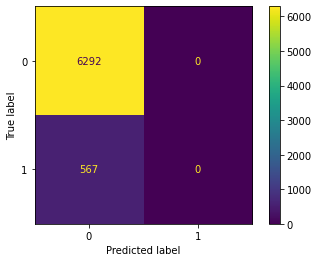

In [158]:
plot_confusion_matrix(model, scaled_X_test, y_test)

In [159]:
from sklearn.svm import SVC

In [160]:
svm_model = SVC(class_weight='balanced', random_state=101, )

In [161]:
# param_grid = {'C': [1.0, 10.0, 100.0],
#               'kernel': ['rbf', 'poly'],
#               'degree': [2, 3],
#              }

In [162]:
# svm_grid = GridSearchCV(svm_model, cv=10, param_grid=param_grid, scoring='accuracy', n_jobs=-1)
# svm_grid.fit(scaled_X_train, y_train)
# print('Best Parameters using grid search: \n', svm_grid.best_params_)

In [163]:
svm_model.fit(scaled_X_train, y_train)

SVC(class_weight='balanced', random_state=101)

In [172]:
y_pred = svm_model.predict(scaled_X_test)

In [173]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.73      0.84      6292
           1       0.21      0.79      0.33       567

    accuracy                           0.74      6859
   macro avg       0.59      0.76      0.59      6859
weighted avg       0.91      0.74      0.80      6859



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


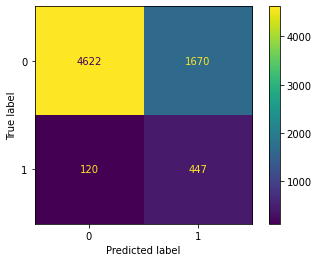

In [177]:
plot_confusion_matrix(svm_model, scaled_X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


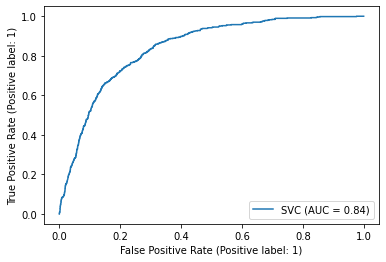

In [178]:
plot_roc_curve(svm_model, scaled_X_test, y_test)

In [167]:
from sklearn.linear_model import LogisticRegressionCV

In [170]:
model = LogisticRegressionCV(cv=10, class_weight='balanced', n_jobs=-1, solver='saga', max_iter=1000000)

In [171]:
model.fit(scaled_X_train, y_train)

LogisticRegressionCV(class_weight='balanced', cv=10, max_iter=1000000,
                     n_jobs=-1, solver='saga')

In [174]:
y_pred = model.predict(scaled_X_test)

In [175]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.73      0.84      6292
           1       0.21      0.77      0.33       567

    accuracy                           0.74      6859
   macro avg       0.59      0.75      0.58      6859
weighted avg       0.91      0.74      0.79      6859



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


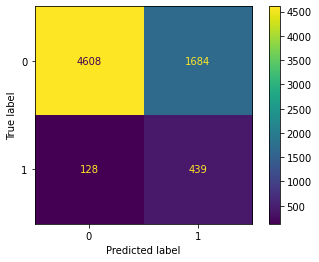

In [179]:
plot_confusion_matrix(model, scaled_X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


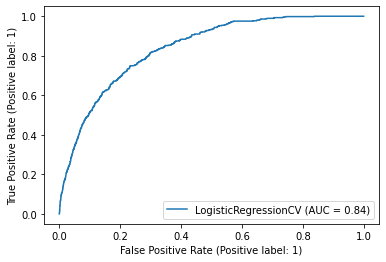

In [181]:
plot_roc_curve(model, scaled_X_test, y_test)

In [ ]:
#SVM , LogisticRegression model performs better with AUC=0.84 